# Convert between color spaces


In [17]:
import numpy as np
np.set_printoptions(threshold=np.inf)
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

(<matplotlib.axes._subplots.AxesSubplot at 0x12acd8080>,
 Text(0.5, 1.0, 'image -> gray -> rgb'))

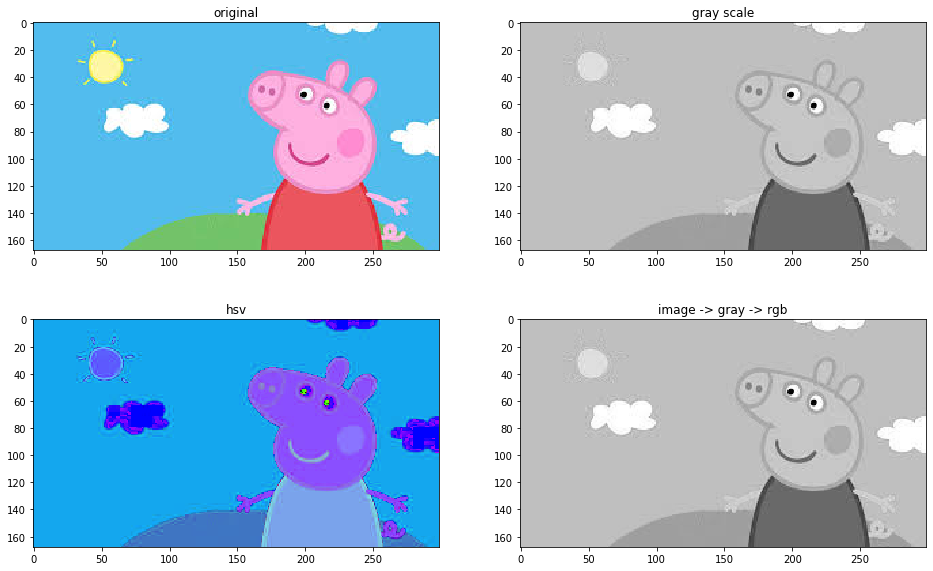

In [75]:
image = cv2.imread('peppa.jpeg')

#to gray
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# gray to color
rgb = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)

plt.figure(figsize=(16, 10))
plt.subplot(2,2,1), plt.imshow(image[...,::-1]), plt.title("original")
plt.subplot(2,2,2), plt.imshow(gray, cmap='gray'), plt.title("gray scale")
plt.subplot(2,2,3), plt.imshow(hsv), plt.title("hsv")
plt.subplot(2,2,4), plt.imshow(rgb[...,::-1]), plt.title("image -> gray -> rgb")



In [3]:
#why rgb is not colored?
rgb.shape

(168, 299, 3)

In [9]:
gray

array([[191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191,
        191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191,
        191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191,
        191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191,
        191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191,
        191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191,
        191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191,
        191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191,
        191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191,
        191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191,
        191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191,
        191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191,
        191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191,
        191, 191, 191, 191, 191, 191, 191, 191, 191

In [78]:
np.allclose(gray,rgb[...,2])

True

In [15]:
#why hsv color is "weird?"

#let's save it to disk
cv2.imwrite('hsv.jpeg', hsv)


True

![alt text](hsv.jpeg "Logo Title Text 1")


### Note: Opencv only display image as RGB image, matplotlib (BGR) 

--> in order to display hsv, we must convert it to RGB/BGR first


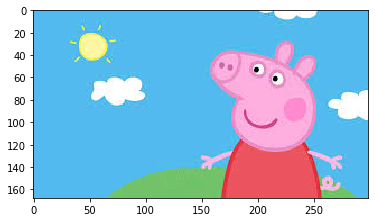

In [79]:
rgb_from_hsv = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

# plt.imshow(rgb_from_hsv[...,::-1])
plt.imshow(rgb_from_hsv)

# Intensity to color transformation

Colormaps

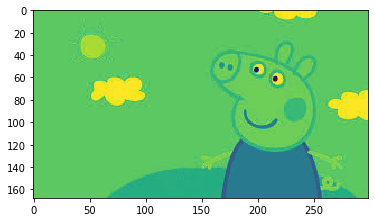

In [87]:
plt.imshow(gray, cmap='viridis')

In [82]:
cm = matplotlib.cm.get_cmap('viridis', 12)
print(cm)

In [86]:
cm(256)   #return an RGBA value, output: range 0-1

(0.993248, 0.906157, 0.143936, 1.0)

In [57]:
print(cm.colors)

[[0.267004 0.004874 0.329415 1.      ]
 [0.283072 0.130895 0.449241 1.      ]
 [0.262138 0.242286 0.520837 1.      ]
 [0.220057 0.343307 0.549413 1.      ]
 [0.177423 0.437527 0.557565 1.      ]
 [0.143343 0.522773 0.556295 1.      ]
 [0.119512 0.607464 0.540218 1.      ]
 [0.166383 0.690856 0.496502 1.      ]
 [0.319809 0.770914 0.411152 1.      ]
 [0.525776 0.833491 0.288127 1.      ]
 [0.762373 0.876424 0.137064 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]


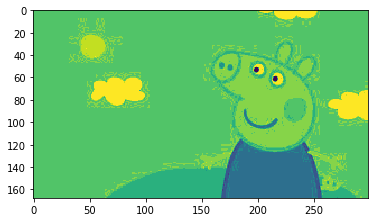

In [58]:
plt.imshow(gray, cmap=cm)

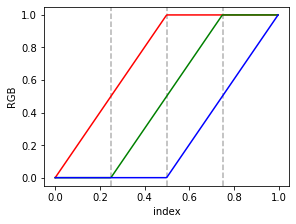

In [63]:
cdict = {'red':   [[0.0,  0.0, 0.0],
                   [0.5,  1.0, 1.0],
                   [1.0,  1.0, 1.0]],
         'green': [[0.0,  0.0, 0.0],
                   [0.25, 0.0, 0.0],
                   [0.75, 1.0, 1.0],
                   [1.0,  1.0, 1.0]],
         'blue':  [[0.0,  0.0, 0.0],
                   [0.5,  0.0, 0.0],
                   [1.0,  1.0, 1.0]]}

newcmp = matplotlib.colors.LinearSegmentedColormap('testCmap', segmentdata=cdict, N=256)

def plot_linearmap(cdict):
    newcmp = matplotlib.colors.LinearSegmentedColormap('testCmap', segmentdata=cdict, N=256)
    rgba = newcmp(np.linspace(0, 1, 256))
    fig, ax = plt.subplots(figsize=(4, 3), constrained_layout=True)
    col = ['r', 'g', 'b']
    for xx in [0.25, 0.5, 0.75]:
        ax.axvline(xx, color='0.7', linestyle='--')
    for i in range(3):
        ax.plot(np.arange(256)/256, rgba[:, i], color=col[i])
    ax.set_xlabel('index')
    ax.set_ylabel('RGB')
    plt.show()

plot_linearmap(cdict)

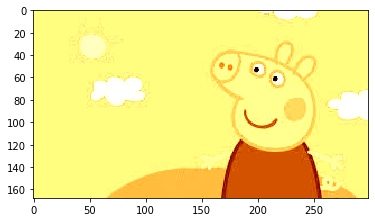

In [64]:
plt.imshow(gray, cmap=newcmp)

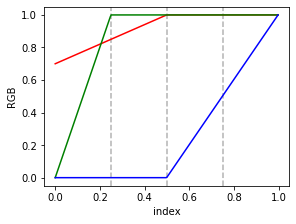

In [73]:
cdict = {'red':   [[0.0,  0.5, 0.7],
                   [0.5,  1.0, 1.0],
                   [1.0,  1.0, 1.0]],
         'green': [[0.0,  0.0, 0.0],
                   [0.25, 1.0, 1.0],
                   [0.75, 1.0, 1.0],
                   [1.0,  1.0, 1.0]],
         'blue':  [[0.0,  0.0, 0.0],
                   [0.5,  0.0, 0.0],
                   [1.0,  1.0, 1.0]]}

cdict['red'] = [[0.0,  0.5, 0.7],
                [0.5,  1.0, 0.9],
                [1.0,  1.0, 1.0]]

newcmp2 = matplotlib.colors.LinearSegmentedColormap('testCmap', segmentdata=cdict, N=256)
plot_linearmap(cdict)

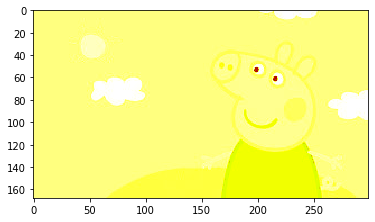

In [74]:
plt.imshow(gray, cmap=newcmp2)

# Color Image Segmentation

Reference code:

Finding Nemo: [https://github.com/realpython/materials/tree/master/opencv-color-spaces](https://github.com/realpython/materials/tree/master/opencv-color-spaces)

Blog: [https://realpython.com/python-opencv-color-spaces/](https://realpython.com/python-opencv-color-spaces/)

In [7]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors

from mpl_toolkits.mplot3d import Axes3D  # noqa
from matplotlib.colors import hsv_to_rgb

%matplotlib inline

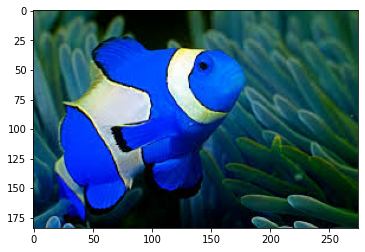

In [3]:
nemo = cv2.imread("./nemo0.jpg")
plt.imshow(nemo)
plt.show()

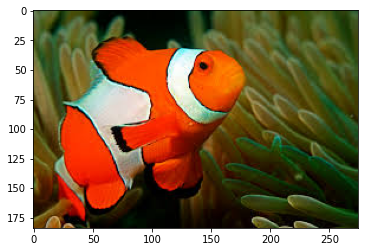

In [5]:
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)

plt.imshow(nemo)
plt.show()

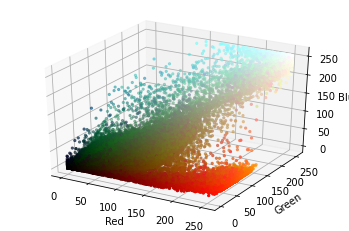

In [8]:
# Plotting the image on 3D plot

r, g, b = cv2.split(nemo)

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = nemo.reshape((np.shape(nemo)[0] * np.shape(nemo)[1], 3))
norm = colors.Normalize(vmin=-1.0, vmax=1.0)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(
    r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker="."
)
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

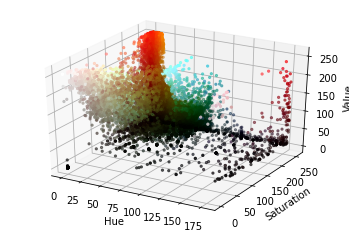

In [11]:
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)

h, s, v = cv2.split(hsv_nemo)

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(
    h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker="."
)
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()


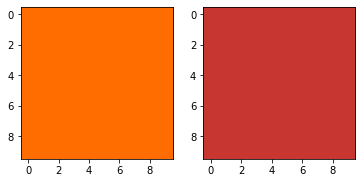

In [12]:
# Normalise to 0 - 1 range for viewing
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

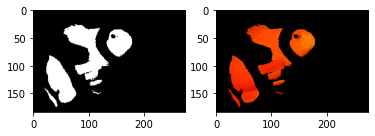

In [13]:
# Segment Nemo using inRange() function

mask = cv2.inRange(hsv_nemo, light_orange, dark_orange)

# Bitwise-AND mask and original image

result = cv2.bitwise_and(nemo, nemo, mask=mask)

# Convert back to RGB in order to plot using `matplotlib.pyplot`

plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

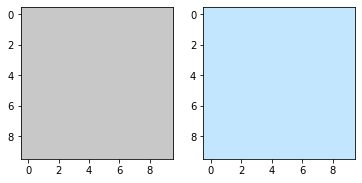

In [14]:
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

lw_square = np.full((10, 10, 3), light_white, dtype=np.uint8) / 255.0
dw_square = np.full((10, 10, 3), dark_white, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lw_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(dw_square))
plt.show()


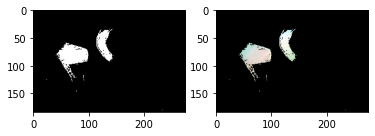

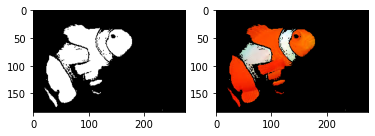

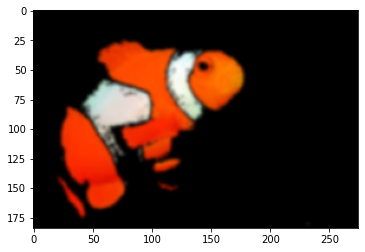

In [15]:
mask_white = cv2.inRange(hsv_nemo, light_white, dark_white)
result_white = cv2.bitwise_and(nemo, nemo, mask=mask_white)

plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.show()

final_mask = mask + mask_white

final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)

plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

blur = cv2.GaussianBlur(final_result, (7, 7), 0)

plt.imshow(blur)
plt.show()

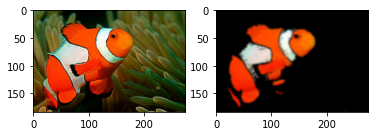

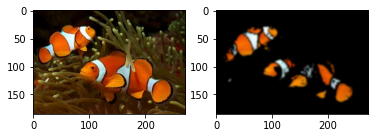

In [16]:
# Generalising the segmentation
import glob
images = glob.glob("./nemo*.jpg")

nemos_friends = []
for iname in images:
    friend = cv2.cvtColor(
        cv2.imread(iname), cv2.COLOR_BGR2RGB
    )
    nemos_friends.append(friend)


def segment_fish(image):
    """ Attempts to segment the clown fish out of the provided image. """
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    light_orange = (1, 190, 200)
    dark_orange = (18, 255, 255)
    mask = cv2.inRange(hsv_image, light_orange, dark_orange)
    light_white = (0, 0, 200)
    dark_white = (145, 60, 255)
    mask_white = cv2.inRange(hsv_image, light_white, dark_white)
    final_mask = mask + mask_white
    result = cv2.bitwise_and(image, image, mask=final_mask)
    result = cv2.GaussianBlur(result, (7, 7), 0)
    return result


results = [segment_fish(friend) for friend in nemos_friends]

for i in range(len(images)):
    plt.subplot(1, 2, 1)
    plt.imshow(nemos_friends[i])
    plt.subplot(1, 2, 2)
    plt.imshow(results[i])
    plt.show()
